# Example calculation of 95% confidence intervals
## Monthly mean 30yr average climatology


Programming and statistical task: 

- Calculate the long-term mean for the average temperatures years 1951-1980 and 1989-2018
- for each month: January, February, March , ... November, December

- Determine the 95% confidence interval using the equations described in the reading assignment



### OET: To update: provide reference to the reading assignment where students can find a precise description of the calculation steps. Then add also the description and link to the t-distribution in scipy. Explain the use of CDF function. 




### 1. Code developmen:

### Working with Global Historical Climate Network  data. 

This script defines a function that downloads now monthly mean from the Global Historical Climate Network (GHCN).
The data server is the same that we used for the daily data: the Applied Climate Information System (ACIS). [http://data.rcc-acis.org](http://data.rcc-acis.org)

In the code below we have selected the station Albany Airport (KALB). The GHCN station idenifier is 

__'USW00014735'__

We can get for example: 
- avgt: daily average temperature (F)
- tmin: daily minimum temperature (F)
- tmax: daily maximum temperature (F)

Try it yourself in a browser window use the http-link with the data query string appended:

[http://data.rcc-acis.org/StnData?sid=USW00014735&&sdate=2018-01-1&&edate=2018-12-31&interval=dly&elems=avgt](http://data.rcc-acis.org/StnData?sid=USW00014735&&sdate=2018-01-1&&edate=2018-12-31&interval=dly&elems=avgt)

This will return daily mean temperatures from ALbany Airport for the year 2018.


## Code development

The script provides a similar function that we have used in the Unit 4. We send a request to the server for one station (Albany airport, station ID *USW00014735*)

The return JSON data format is unpacked and two lists are returned with the datetime objects, and the monthly mean average temperature. The average monthly temperature is what 
we will work with.

The function is now called *get_stationdata_monthly*. Is very similar to the previous function that we used in connection with the daily data.


In [5]:
# request a station time series
# from Applied Climate Information System
# http://www.rcc-acis.org/index.html
# Author: OET
# code designed for ATM315/ENV315 Python introduction

import numpy as np
import matplotlib.pyplot as plt

In [1]:
import urllib3
import json
import datetime as dt
#########################################################################################################
# defining a function to allow us to make more than just one specific data request
# it allows flexibilty in terms of station, variable, start and end year
# It first creates the http-string and uses the urllib3 functions to transmit the request to the server
# Then it receives the data in the JSON text format and converts it into a nested list object
# That's where we had to put some work in to extract the dates and data values and put them into lists
# two lists are returned, one with the dates (NEW object type 'datetime'!) and teh numerical values.
#########################################################################################################
def get_stationdata_monthly(sid,var='avgt',startyear=2017,endyear=2017):
    """Sends request to regional climate center ACIS and gets monthly data for one station.
    Input parameters: 
        sid (string): a station id
        var (string): a variable name (e.g. 'avgt', 'mint', 'maxt')
    Optional parameters:
        startyear and endyear (integers): for selecting the year range e.g. 1950 and 2017
    
    Returned objects:
        list with dates (datetime objects)
        list with the data 
    """    
    # the http address of the data server
    host="http://data.rcc-acis.org/StnData"
    # forming the query string for the host server
    sdate='&sdate='+str(startyear)+'-01-1'
    edate='&edate='+str(endyear)+'-12-31'
    query='?sid='+sid+'&'+sdate+'&'+edate+'&interval=mly&'\
    +'elems='+"mly_mean_"+var
    # try to connect and to get the requested data
    # in format ready to export to a csv file
    print (">send data request to "+host+query)
    print ("> still waiting for response ...")
    try:
        http= urllib3.PoolManager()
        response = http.request('GET',host+query)
        # convert json-string into dictionary
        content =  json.loads(response.data.decode('utf-8'))
        meta=content['meta']
        data=content['data']
        time=[]
        value=[]
        for item in data:
            #print (item)
            time.append(dt.datetime.strptime(item[0],"%Y-%m"))
            if (item[1]!='M'):
                value.append(float(item[1]))
            else:
                value.append(np.NAN)
    except Exception as e:
        print ("error occurred:", e)
        return
    print(">... done")
    return time,value

In [2]:
print(help(get_stationdata_monthly))

Help on function get_stationdata_monthly in module __main__:

get_stationdata_monthly(sid, var='avgt', startyear=2017, endyear=2017)
    Sends request to regional climate center ACIS and gets monthly data for one station.
    Input parameters: 
        sid (string): a station id
        var (string): a variable name (e.g. 'avgt', 'mint', 'maxt')
    Optional parameters:
        startyear and endyear (integers): for selecting the year range e.g. 1950 and 2017
    
    Returned objects:
        list with dates (datetime objects)
        list with the data

None


In [3]:
x,y=get_stationdata_monthly("USW00014735",'avgt',startyear=1950,endyear=2018)

>send data request to http://data.rcc-acis.org/StnData?sid=USW00014735&&sdate=1950-01-1&&edate=2018-12-31&interval=mly&elems=mly_mean_avgt
> still waiting for response ...
>... done


30


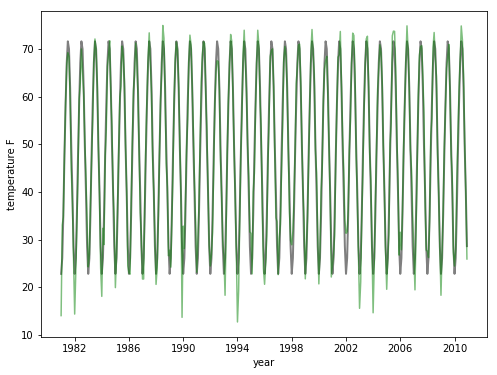

In [9]:
year, month=[], []
x=np.array(x)
y=np.array(y)

for date in x:
    year.append(date.year)
    month.append(date.month)
year=np.array(year)
month=np.array(month)

isclim=np.logical_and(year>1980,year<2011)
yhelp=y[isclim]
iyr=int(np.sum(isclim)/12)
print(iyr)
plt.figure(figsize=[8,6])

plt.xlabel("year")
plt.ylabel("temperature F")
yclim=np.reshape(y[isclim],newshape=[iyr,12])
yclimmean=np.mean(yclim,axis=0)
plt.plot(x[isclim],np.tile(yclimmean,iyr),color='black',linewidth=2,alpha=0.5)
plt.plot(x[isclim],y[isclim],alpha=0.5,color='green')
plt.show()



<BarContainer object of 177 artists>

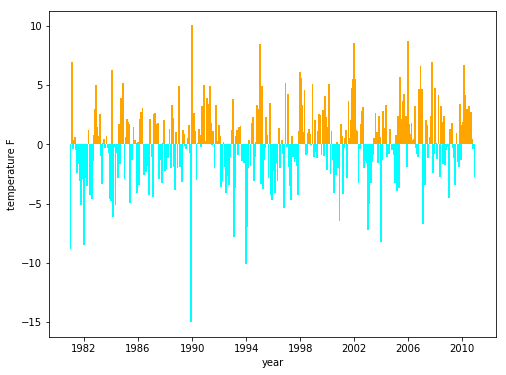

In [39]:
anom=y[isclim]-np.tile(yclimmean,iyr)
plt.figure(figsize=[8,6])
plt.xlabel("year")
plt.ylabel("temperature F")
xhelp=x[isclim]
is_pos=anom>0
is_neg= anom<0
plt.bar(xhelp[is_pos],anom[is_pos],color='orange',width=50)
plt.bar(xhelp[is_neg],anom[is_neg],color='cyan',width=50)

69


<BarContainer object of 436 artists>

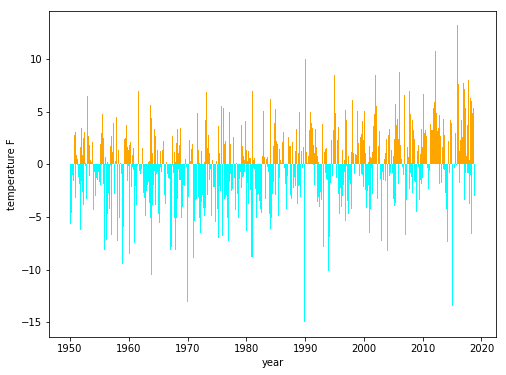

In [41]:
iyr=int(np.size(y)/12)
print(iyr)
anom=y-np.tile(yclimmean,iyr)
plt.figure(figsize=[8,6])
plt.xlabel("year")
plt.ylabel("temperature F")
xhelp=x
is_pos=anom>0
is_neg= anom<0
plt.bar(xhelp[is_pos],anom[is_pos],color='orange',width=50)
plt.bar(xhelp[is_neg],anom[is_neg],color='cyan',width=50)

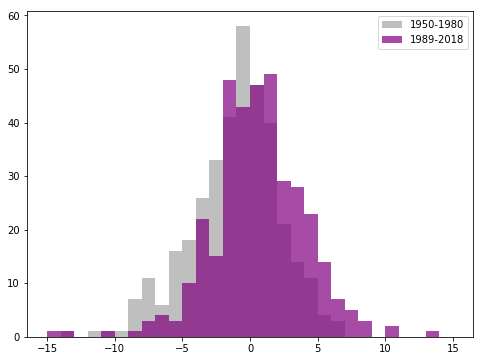

In [53]:
i1=np.logical_and(year>1950,year<1981)
i2=np.logical_and(year>1988,year<2019)
iyr1=int(np.sum(i1)/12)
iyr2=int(np.sum(i2)/12)

anom1=y[i1]-np.tile(yclimmean,iyr1)
anom2=y[i2]-np.tile(yclimmean,iyr2)
plt.figure(figsize=[8,6])
bin_edges=np.arange(-15,16,1)
plt.hist(anom1,bins=bin_edges,color='gray',label="1950-1980",alpha=0.5)
plt.hist(anom2,bins=bin_edges,color='purple',label='1989-2018',alpha=0.7)
plt.legend()
plt.show()

In [ ]:
### Further References:
- [GHCND](https://www.ncdc.noaa.gov/ghcn-daily-description)
- FTP site with station ids etc: ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/